### Chapter 2.3 
# Transform Methods

---
>(c) Tobias Hossfeld  (Aug 2021)<br><br>
> This script and the figures are part of the following book. The book is to be cited whenever the script is used (copyright CC BY-SA 4.0):<br>
> *Tran-Gia, P. & Hossfeld, T. (2021). 
Performance Modeling and Analysis of Communication Networks - A Lecture Note.
Würzburg University Press.*
> *https://doi.org/10.25972/WUP-978-3-95826-153-2*

---
 
Transform methods are often employed in analytical treatment of performance models. For discrete random variables, we consider the *Generating Function*. For continuous random variables, we consider the *Laplace Transform*.

## Generating Function
Given a discrete random variable $ X $ with the distribution
$ x(i) = P (X = i)$, for $i=0, 1, \ldots$.
The probability generating function (or, for short, generating function GF) for the random variable $X$ is defined as

$
 X_{GF}(z) =  GF\{x(i)\}  = \sum_{i=0}^\infty x(i) z^i = E[z^X] 
$ 

where $z$ is a complex(-valued) Variable. 

In our example, we consider a Binomial distribution $X \sim \mathrm{BINOM}(N,p)$ which has the generating function 
$
 X_{GF}(z) =  (1-p+pz)^N
$ 
and a geometric distribution $Y \sim \mathrm{GEOM}(p)$ which has the generating function 
$
 Y_{GF}(z) =  \frac{p}{1-z+pz}
$.

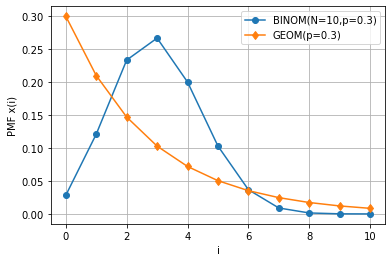

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom, geom

N, p = 10, 0.3 # parameter of the Binomial distribution

i = np.arange(N+1)

plt.plot(i, binom.pmf(i, N, p), 'o-', label=f'BINOM(N={N},p={p})')
plt.plot(i, geom.pmf(i, p, loc=-1), 'd-', label=f'GEOM(p={p})')

plt.xlabel('i')
plt.ylabel('PMF x(i)')
plt.grid(which='major')
plt.legend();

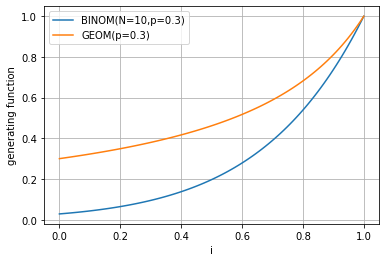

In [95]:
X_GF = lambda z: (1-p+p*z)**N
z = np.linspace(0,1,100)
plt.plot(z, X_GF(z), label=f'BINOM(N={N},p={p})')

Y_GF = lambda z: p/(1-z+p*z)
plt.plot(z, Y_GF(z), label=f'GEOM(p={p})')


plt.xlabel('i')
plt.ylabel('generating function')
plt.grid(which='major')
plt.legend();

### Inverse Transform of the Generating Function
As the name 'probability generating function' already suggests, the distribution $x(i) $ can be obtained from the generating function.

$
 x(i) = GF^{-1}\{X_{GF}(z)\} = \frac{1}{i!} \cdot
 \frac{d^i X_{GF}(z)}{dz^i} |_{z=0} 
$

The derivative is calculated using `scipy.misc.derivative` with parameters `order`and `dx` which are quite sensitive and have to be carefully selected to avoid numerical issues. 

*Play with the parameter `dx`. What happens?*

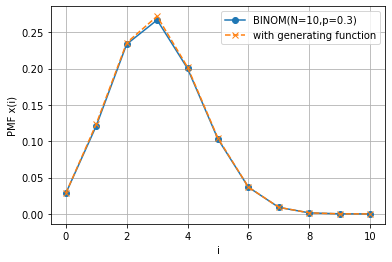

In [96]:
from scipy.misc import derivative
from scipy.special import factorial

xi = binom.pmf(i, N, p) 

xi_gf = np.zeros_like(xi)

xi_gf[0] = X_GF(0)
for n in np.arange(1,N+1):        
    order = n+2 if n%2 else n+1
    xi_gf[n] = derivative(X_GF, 0.0, n=n, order=order, dx=1e-1)/factorial(n)

plt.plot(i, xi, 'o-', label=f'BINOM(N={N},p={p})')
plt.plot(i, xi_gf, 'x--', label=f'with generating function')

plt.xlabel('i')
plt.ylabel('PMF x(i)')
plt.grid(which='major')
plt.legend();


## Laplace Transform
The Laplace transform (LT) or respectively the Laplace-Stieltjes transform (LST) play a central role in analysis methods of continuous-time systems.

Let $ A (t) $ be the cumulative distribution function and $ a (t) $ the density function of a non-negative continuous random variable $ A $.
The Laplace-Stieltjes transform of $ A (t) $ and the Laplace transform of $ a (t) $ are defined as follows:

$
 \Phi_A(s) = LT\{a(t)\}  = \int\limits_{0}^\infty e^{-st} a(t) \;dt = {E[e^{-sA}]}	\;, \quad \mbox{Re}(s) \geq 0 \;,
$

Let us consider an exponential distribution with $A \sim \mathrm{EXP}(\lambda)$ and $ \Phi_A(s)=\frac{\lambda}{\lambda+s}$ and an Erlang-$k$ distribution $B$ with $ \Phi_B(s)=(\frac{\lambda}{\lambda+s})^k$.

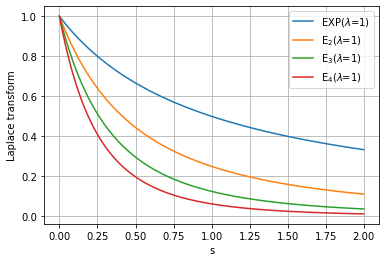

In [97]:
lam = 1.0

LT_A = lambda s: lam/(lam+s)


s = np.linspace(0,2,100)
plt.plot(s, LT_A(s), label=f'EXP($\lambda$={lam:g})')

for k in range(2,5):
    plt.plot(s, LT_A(s)**k, label=f'E$_{k}(\lambda$={lam:g})')

plt.xlabel('s')
plt.ylabel('Laplace transform')
plt.grid(which='major')
plt.legend();

### Inverse Laplace Transform
We are using the Python package mpmath to compute numerically the inverse Laplace transform.

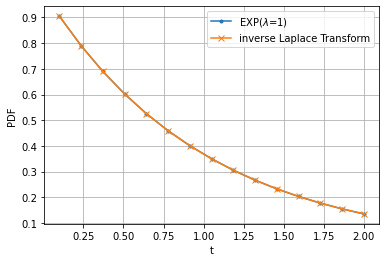

In [98]:
from mpmath import *

t = np.linspace(0.1,2,15)

plt.plot(t, lam*np.exp(-lam*t), '.-', label=f'EXP($\lambda$={lam:g})')

ft = [invertlaplace(LT_A,t0,method='talbot') for t0 in t]
plt.plot(t, ft, 'x-', label='inverse Laplace Transform')

plt.xlabel('t')
plt.ylabel('PDF')
plt.grid(which='major')
plt.legend();